### Prediction of Music Genre
Classify music into genres by classical machine learning models


Workflow stages:

    1. Question or problem definition.
    2. Import protocol, acquire training and testing data.
    3. Wrangle, prepare, cleanse the data.
    4. Analyze, identify patterns, and explore the data.
    5. Model, predict and solve the problem.
    6. Visualize, report, and present the problem-solving steps and final solution.
    7. Supply or submit the results.


##### Chapter 1: Question or problem definition

In this Kaggle dataset, the song genre needs to be classified by their genre.
No early description is given on the feature collection methods, quality, or any other type of data.

##### Chapter 2: Import protocol, acquire training and testing data

The data provided in this project is a '.csv' file with no separation between train and test datasets. Stages 3 & 4 will be conducted on a single dataset to maintain its integrity.

In [1]:
# Data analysis tools
import numpy as np
import pandas as pd

# Visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

# Pre-machine learning tools
from sklearn import preprocessing  # Perform data standardization
from sklearn.model_selection import train_test_split  # split data
from sklearn.model_selection import KFold  # Perform train split for validation
from sklearn.decomposition import PCA  # Linear dimensionality reduction

# Machine learning Algorithms
from sklearn.naive_bayes import GaussianNB  # Naive Bayes classifier for categorical features
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree for classification
from sklearn.ensemble import RandomForestClassifier  # Random Forest ensemble for classification
from sklearn.svm import SVC  # C-Support Vector Classification
from sklearn.model_selection import GridSearchCV  # Exhaustive search over specified parameter values for an estimator

# Post-machine learning analysis
from sklearn.metrics import accuracy_score  # Top-k Accuracy classification score
from sklearn.metrics import classification_report  # Report precision, recall, f1-score, and more
%run classification_report_plot.ipynb  # Generate heatmap from classification report

# Other
from warnings import filterwarnings  # warning filters
filterwarnings(action='ignore') # Prevent convergence warning and math errors

In [2]:
df = pd.read_csv('music_genre.csv')

##### Chapter 3: Wrangle, prepare, cleanse the data

 **Features Review:**
 
 **Labels:** music_genre (to be separated)
 
 **Numerical:**
 instance_id, popularity, acousticness, danceability, duration_ms, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence
 
 
 **Categorical:**
 key, mode
 
 **Other:**
  artist_name, track_name - text
  
 obtained_date - irrelevant

 **Note:** while the tempo feature is an object, it is numerical.

In [3]:
print(df.dtypes)

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object


In [4]:
df.head()

instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.201  Minor       0.0748             100.889         4-Apr   
1     0.124    -7.043  Minor       0.0300  115.00200000000001         4-Apr   
2     0.534    -4.617  Major       0.0345             127.994         4-Apr   
3     0.157    -4.498  Major       0.2390             128.014         4-Apr   
4     0.157    -6.266  Major       0.0413             145.036         4-Apr   

   valence music_genre  
0    0.759  Electronic  
1    0.531  Electronic  
2    0.333  Electronic  
3    0.270  Electronic  
4    0.323  Electronic

**missing data:**

5 enteries are blank

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

**Errors or typos:**

artist_name: missing data is represented by "empty_field".

track_name: non-english ASCI synbols.

duration: unknown duration marked as "-1"

tempo: unknown tempo is described as "?"

In [6]:
df.tail()

instance_id        artist_name                track_name  popularity  \
50000      58878.0              BEXEY                  GO GETTA        59.0   
50001      43557.0          Roy Woods       Drama (feat. Drake)        72.0   
50002      39767.0             Berner  Lovin' Me (feat. Smiggz)        51.0   
50003      57944.0          The-Dream         Shawty Is Da Shit        65.0   
50004      63470.0  Naughty By Nature            Hip Hop Hooray        67.0   

       acousticness  danceability  duration_ms  energy  instrumentalness key  \
50000       0.03340         0.913         -1.0   0.574               0.0  C#   
50001       0.15700         0.709     251860.0   0.362               0.0   B   
50002       0.00597         0.693     189483.0   0.763               0.0   D   
50003       0.08310         0.782     262773.0   0.472               0.0   G   
50004       0.10200         0.862     267267.0   0.642               0.0  F#   

       liveness  loudness   mode  speechiness               tempo  \
50000     0.119    -7.022  Major       0.2980   98.02799999999999   
50001     0.109    -9.814  Major       0.0550  122.04299999999999   
50002     0.143    -5.443  Major       0.1460             131.079   
50003     0.106    -5.016  Minor       0.0441   75.88600000000001   
50004     0.272   -13.652  Minor       0.1010   99.20100000000001   

      obtained_date  valence music_genre  
50000         4-Apr    0.330     Hip-Hop  
50001         4-Apr    0.113     Hip-Hop  
50002         4-Apr    0.395     Hip-Hop  
50003         4-Apr    0.354     Hip-Hop  
50004         4-Apr    0.765     Hip-Hop

In [7]:
print(df['duration_ms'].value_counts())
print('_'*50)
print(df['tempo'].value_counts())

-1.0         4939
 240000.0      33
 192000.0      32
 180000.0      28
 216000.0      20
             ... 
 124627.0       1
 203998.0       1
 156572.0       1
 120280.0       1
 270027.0       1
Name: duration_ms, Length: 26028, dtype: int64
__________________________________________________
?                     4980
140.007                 17
120.0                   17
100.00299999999999      16
120.015                 15
                      ... 
171.704                  1
147.955                  1
103.911                  1
147.929                  1
135.5                    1
Name: tempo, Length: 29394, dtype: int64


**Duplicates:**

4 duplicates were found.

Since there are 5 known blank entries, no additional duplicates were found in the dataset.

In [8]:
df.duplicated().sum()

4

**Taking Action:**

    1. Removal of 5 black entries.

    2. Removal of the following features: "instance_id", "artist_name", "track_name", "obtained_date"

    3. Conversion of duration "-1" and tempo "?" to mean values of their features.

    4. Tempo feature conversion from "object" to "float64".

In [9]:
# 1. Removal of 5 black entries
df.dropna(axis=0, how='all', inplace=True)

# 2. Removal of the following features: "instance_id", "artist_name", "track_name", "obtained_date""
df.drop(columns=['instance_id', 'artist_name', 'track_name', 'obtained_date'], axis=1, inplace=True)

# 3. Conversion of duration "-1" and tempo "?" to mean values of their features.
# calculating mean of values without '-1':
duration_without_minus_one = df['duration_ms'].drop(df.loc[df['duration_ms'] == -1].index)
df['duration_ms'].replace(-1, duration_without_minus_one.mean(), inplace=True)

# calculating mean of values without '?':
tempo_without_question_mark = df['tempo'].drop(df.loc[df['tempo'] == '?'].index)
df['tempo'].replace('?', tempo_without_question_mark.astype(float).mean(), inplace=True)

# 4. 'tempo' feature conversion from "object" to "float64".
df['tempo'] = df['tempo'].astype(float)

**Checking actions:**

In [10]:
print(df.info())
print('_'*50)
print('Duration:\n', df['duration_ms'].value_counts())
print('_'*50)
print('Tempo:\n', df['tempo'].value_counts())
print('_'*50)
print('Duplicates:\n', df[df.index.duplicated()])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  float64
 1   acousticness      50000 non-null  float64
 2   danceability      50000 non-null  float64
 3   duration_ms       50000 non-null  float64
 4   energy            50000 non-null  float64
 5   instrumentalness  50000 non-null  float64
 6   key               50000 non-null  object 
 7   liveness          50000 non-null  float64
 8   loudness          50000 non-null  float64
 9   mode              50000 non-null  object 
 10  speechiness       50000 non-null  float64
 11  tempo             50000 non-null  float64
 12  valence           50000 non-null  float64
 13  music_genre       50000 non-null  object 
dtypes: float64(11), object(3)
memory usage: 6.7+ MB
None
__________________________________________________
Duration:
 245503.541466    49

##### Chapter 4: Analyze, identify patterns, and explore the data

**Distribution of numerical feature values**

* Total of 50,000 samples, following the removal of 5 blank rows.
* Popularity is well balanced around 45, in the range of {0, 99}.
* In most songs, acousticness is very low, with 50% below 0.14, in the range of {0, 1}.
* The danceability of the songs is evenly distributed between {0, 0.99}.
* The duration of almost all songs is ~4 minutes ±40 seconds.
* Most song energy is higher than the middle range value of 0.5, {0, 0.999}.
* The vast majority of the songs are not instrumentalness {0, 0.99}.
* Liveness values are centered at the lower scale at 0.19±0.16  in the full range of {0, 1}.
* Loudness is mostly a negative ranged parameter centered around -9.13 spanning {-47.04, 3.7}.
* Most songs speechiness is nearly 0 ranging {0, 0.94}.
* The tempo of most sogs is centered around 120 in range of {34, 220}
* Valence is evenly distributed at 0.45 in range of {0, 0.99}



In [11]:
df.describe()

popularity  acousticness  danceability   duration_ms        energy  \
count  50000.000000  50000.000000  50000.000000  5.000000e+04  50000.000000   
mean      44.220420      0.306383      0.558241  2.455035e+05      0.599755   
std       15.542008      0.341340      0.178632  1.057864e+05      0.264559   
min        0.000000      0.000000      0.059600  1.550900e+04      0.000792   
25%       34.000000      0.020000      0.442000  1.948750e+05      0.433000   
50%       45.000000      0.144000      0.568000  2.360270e+05      0.643000   
75%       56.000000      0.552000      0.687000  2.686122e+05      0.815000   
max       99.000000      0.996000      0.986000  4.830606e+06      0.999000   

       instrumentalness      liveness      loudness   speechiness  \
count      50000.000000  50000.000000  50000.000000  50000.000000   
mean           0.181601      0.193896     -9.133761      0.093586   
std            0.325409      0.161637      6.162990      0.101373   
min            0.000000      0.009670    -47.046000      0.022300   
25%            0.000000      0.096900    -10.860000      0.036100   
50%            0.000158      0.126000     -7.276500      0.048900   
75%            0.155000      0.244000     -5.173000      0.098525   
max            0.996000      1.000000      3.744000      0.942000   

              tempo       valence  
count  50000.000000  50000.000000  
mean     119.952961      0.456264  
std       29.075697      0.247119  
min       34.347000      0.000000  
25%       96.775750      0.257000  
50%      119.952961      0.448000  
75%      139.468250      0.648000  
max      220.276000      0.992000

**Distribution of categorical feature values**

* Key values have 12 unique options, with dominant G in ~11% of the songs.
* Mode variable between two possibilities with a frequency of 2/3 (Major) and 1/3 (Minor)
* Music genres are separable to 10 classes, with Blues as most common with 10%.

In [12]:
df.describe(include=['O'])

key   mode music_genre
count   50000  50000       50000
unique     12      2          10
top         G  Major   Classical
freq     5727  32099        5000

**Most and least correlated music genres per feature:**

---

Popularity:

Rap     60.4974

Anime     24.2716

---

Acousticness:

Classical      0.869139

Electronic      0.121971


---

Danceability: 

Hip-Hop      0.717373

Classical      0.306560

---

Duration_ms:

Classical  303104.910538

Country  219713.715480

---

Energy:  

Electronic  0.738636

Classical  0.176534

---

Instrumentalness:  

Classical          0.600692

Country          0.005320

---

Liveness:   

Blues  0.233206

Classical  0.161046

---

Loudness:    

Alternative  -6.517714

Classical -21.586253

---

Speechiness:     

Hip-Hop     0.207044

Country     0.049032

---

Tempo:      

Anime  126.111168

Classical  105.643167

---

Valence:       

Blues  0.580788

Classical  0.210523

In [13]:
df_numerical_features_list = []
[df_numerical_features_list.append(feature) for feature in df.columns]
df_numerical_features_list.remove('key')
df_numerical_features_list.remove('mode')
df_numerical_features_list.remove('music_genre')

In [14]:
for feature in df_numerical_features_list:
    print(feature, ': \n')
    print(df[[feature, 'music_genre']].groupby(['music_genre'], as_index=False).mean().sort_values(by=feature, ascending=False))
    print('\n')

popularity : 

   music_genre  popularity
8          Rap     60.4974
9         Rock     59.6412
6      Hip-Hop     58.3996
0  Alternative     50.2242
4      Country     46.0100
7         Jazz     40.9286
5   Electronic     38.1118
2        Blues     34.8040
3    Classical     29.3158
1        Anime     24.2716


acousticness : 

   music_genre  acousticness
3    Classical      0.869139
7         Jazz      0.494564
2        Blues      0.317830
1        Anime      0.286968
4      Country      0.268827
9         Rock      0.191394
6      Hip-Hop      0.179093
8          Rap      0.169057
0  Alternative      0.164983
5   Electronic      0.121971


danceability : 

   music_genre  danceability
6      Hip-Hop      0.717373
8          Rap      0.696605
5   Electronic      0.619220
7         Jazz      0.584736
4      Country      0.577316
0  Alternative      0.541124
9         Rock      0.539230
2        Blues      0.529243
1        Anime      0.471002
3    Classical      0.306560


duration_m

**Analyze by visualizing data**

* Good correlation is visible between loudness and energy features.
* Opposite correlation between acousticness to energy and loudness.
* No specific correlation was found in the categorical features.
* Popularity feature has the higher variance between music genres.
* Electronic, blues, and classical music have the highest valence difference between samples parameters.

Due to wide variance between features values, a rescaling is required.

In [15]:
scaler = preprocessing.StandardScaler()
scaler.fit(df[df_numerical_features_list])
df[df_numerical_features_list] = scaler.transform(df[df_numerical_features_list], copy=False)

Show correlation between features:

<AxesSubplot:>

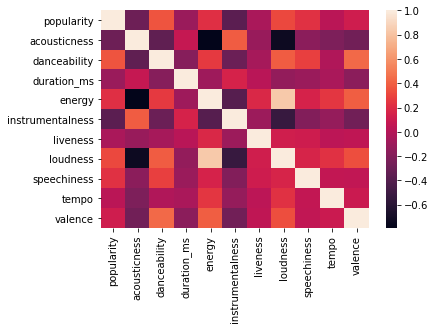

In [16]:

sns.heatmap(df.corr())

Detailed overview of the relationships of the features:

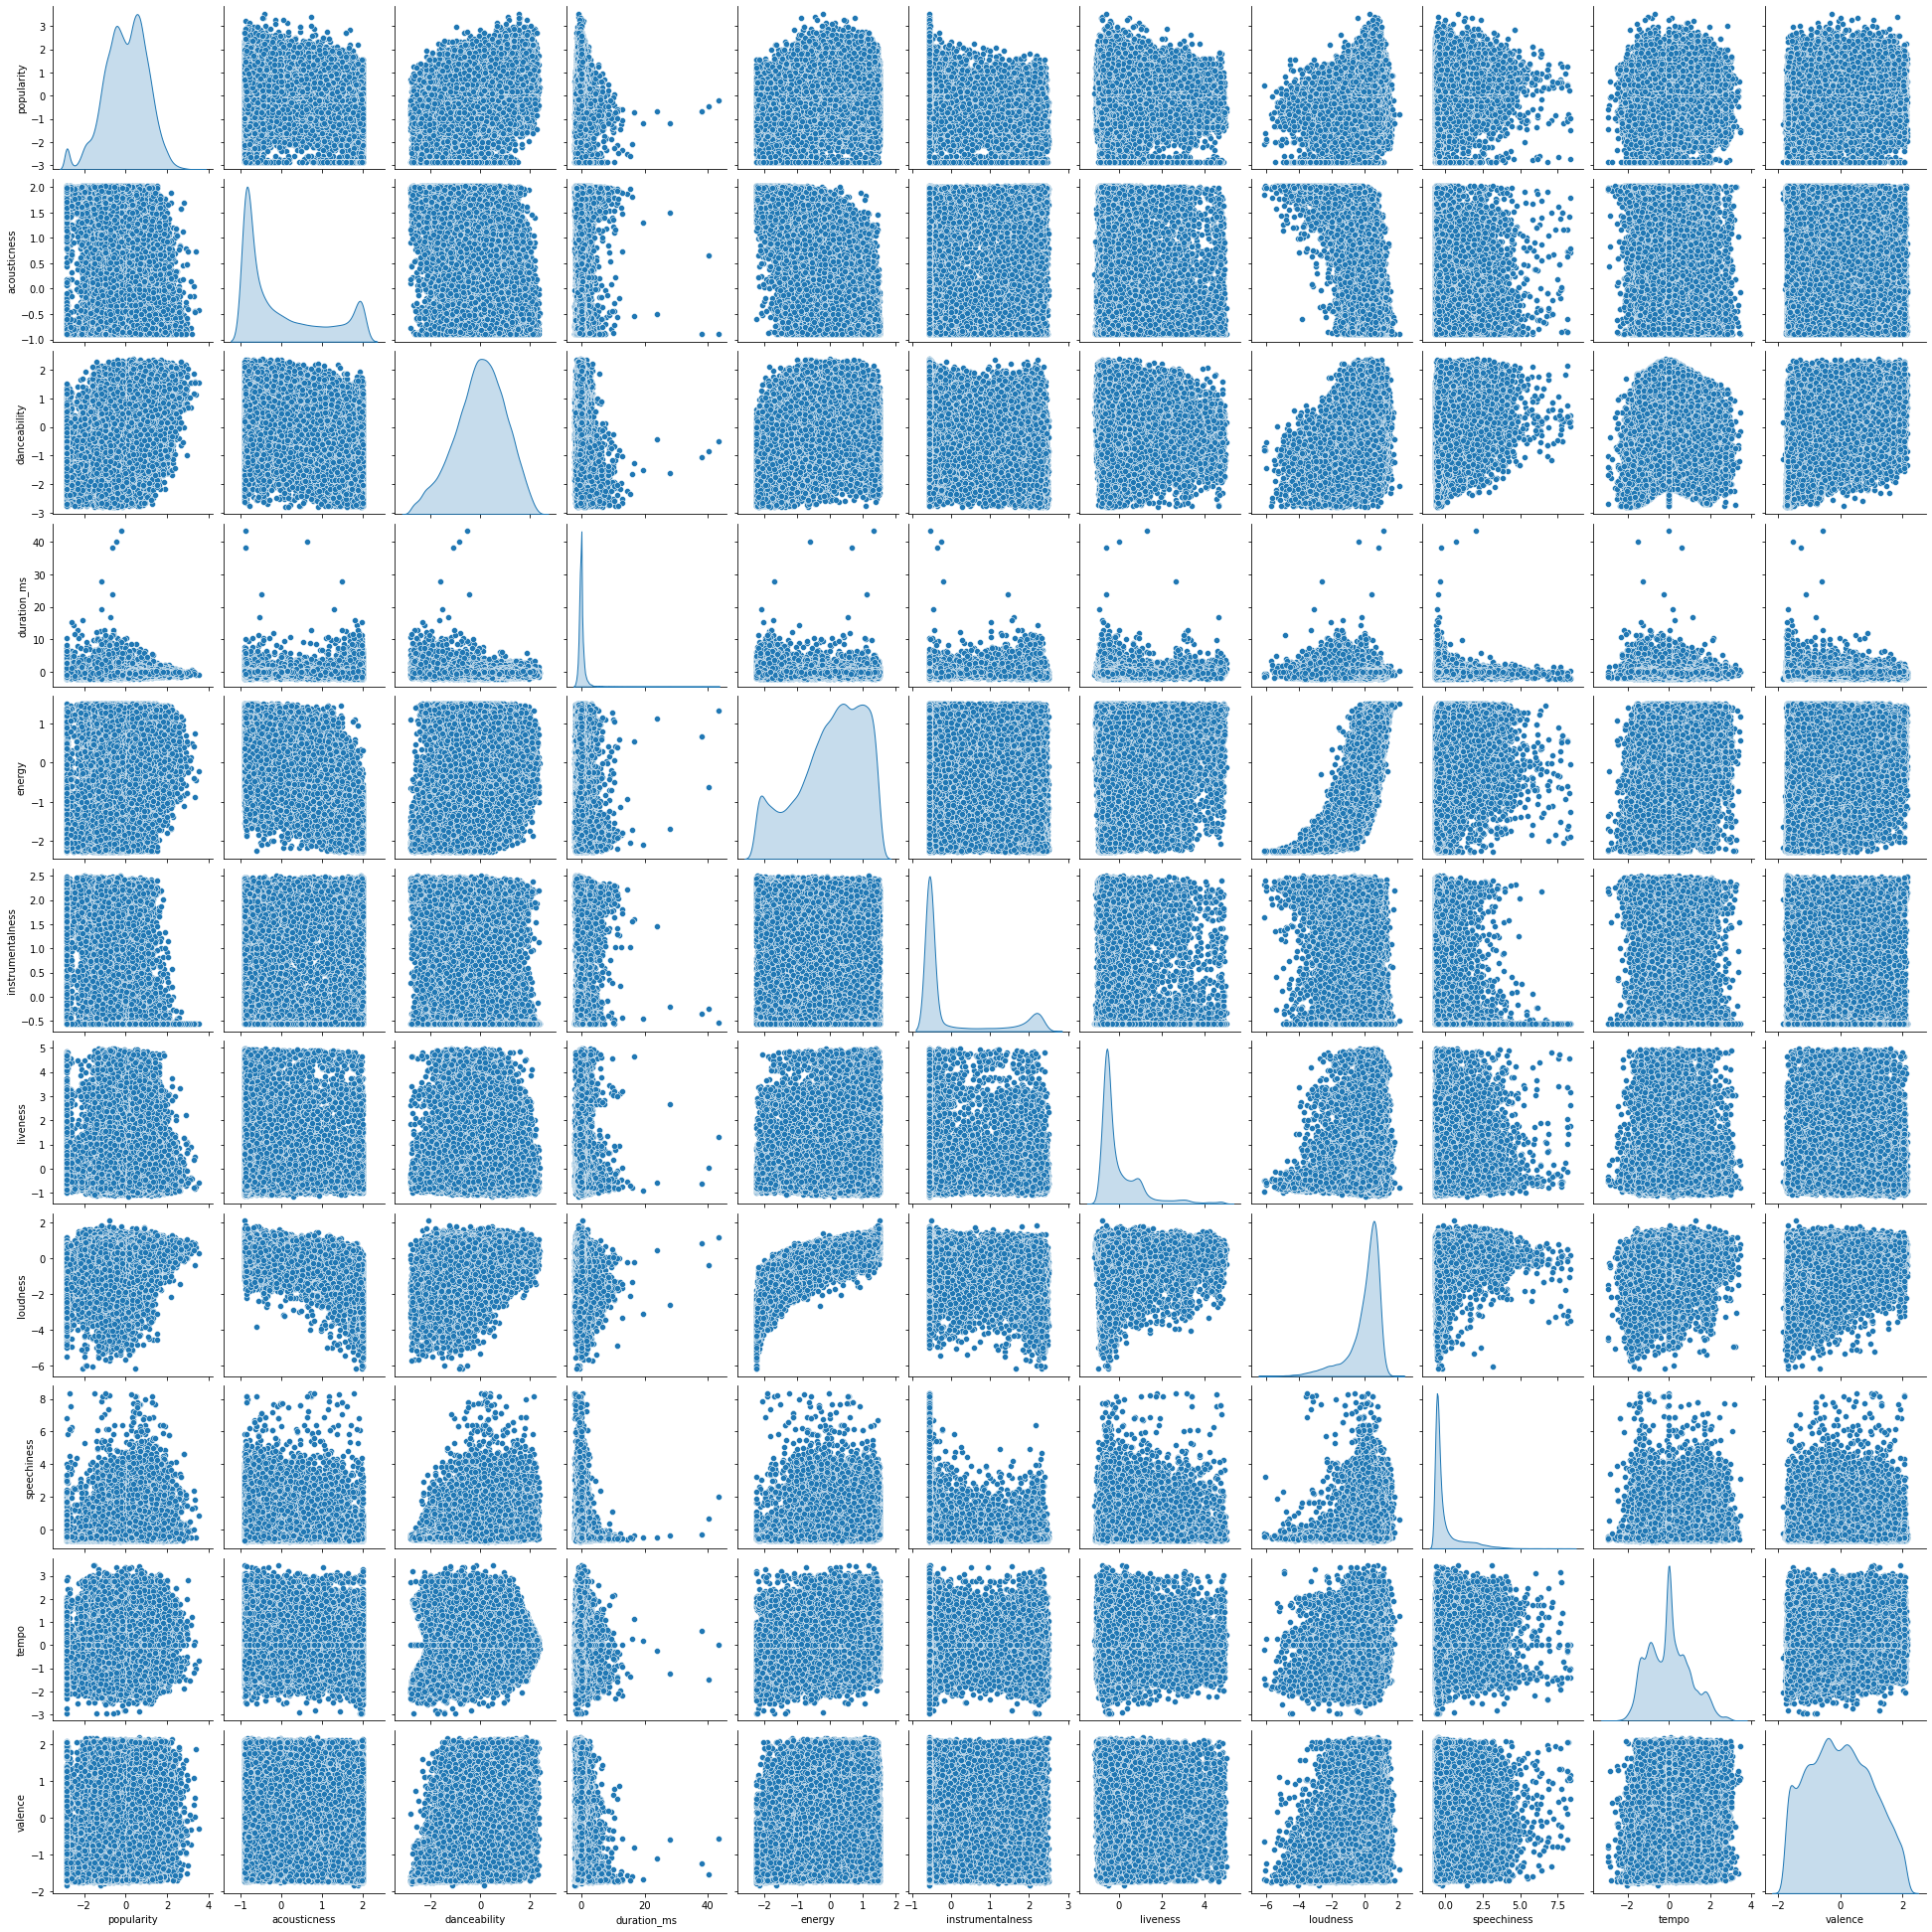

In [17]:
sns.pairplot(df, diag_kind='kde')

In [18]:
# Group data by mean value per music genre.
df_by_classification = df.groupby('music_genre').mean()
df_by_classification.head()

popularity  acousticness  danceability  duration_ms    energy  \
music_genre                                                                  
Alternative    0.386298     -0.414252     -0.095824    -0.103891  0.420042   
Anime         -1.283555     -0.056879     -0.488377    -0.126653  0.244988   
Blues         -0.605875      0.033537     -0.162337     0.071024  0.037792   
Classical     -0.958999      1.648684     -1.408949     0.544512 -1.599735   
Country        0.115146     -0.110025      0.106787    -0.243794  0.147976   

             instrumentalness  liveness  loudness  speechiness     tempo  \
music_genre                                                                
Alternative         -0.371175  0.019937  0.424481    -0.047029  0.080214   
Anime                0.296417 -0.002802  0.189885    -0.285861  0.211801   
Blues               -0.268793  0.243199  0.020158    -0.310037  0.043877   
Classical            1.287903 -0.203236 -2.020548    -0.414428 -0.492161   
Country             -0.541725 -0.037837  0.298009    -0.439513  0.118226   

              valence  
music_genre            
Alternative -0.035414  
Anime       -0.075246  
Blues        0.503907  
Classical   -0.994436  
Country      0.325625

Stacked box-plots of all music genres followed by box-plot matrix separated by genre:

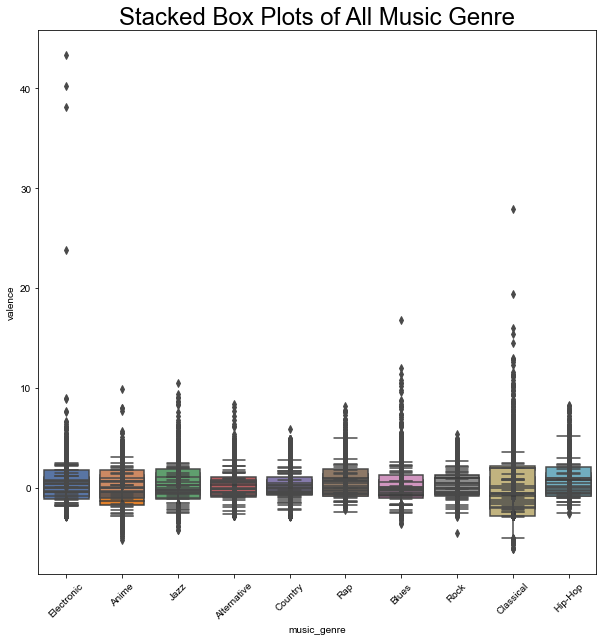

In [19]:
# Create subplots net.
fig, axes = plt.subplots(figsize=(10, 10))

# Fill subplots.
for idx, feature in enumerate(df_numerical_features_list):
    g = sns.boxplot(x='music_genre', y=feature, data=df)
    g.set_title('Stacked Box Plots of All Music Genre')
    plt.xticks(rotation=45)
    sns.set(font_scale=2)

In [20]:
target_names_list = ['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop']

In [21]:
# Create subplots net.
fig, axes = plt.subplots(int(df_by_classification.index.size/2), 2, figsize=(50, 110))

# Fill subplots.
for idx, genre_name in enumerate(target_names_list):
    g = sns.boxplot(ax=axes[idx%5, int(idx/5)], data=df_by_classification)
    g.set_title(df_by_classification.index.values[idx] + ' Genre')
    plt.sca(axes[idx%5, int(idx/5)])
    plt.xticks(rotation=45)
    sns.set(font_scale=2)

Transform key and mode features to one-hot encoding:

In [22]:
df = pd.get_dummies(df, prefix=['key', 'mode'], columns=['key', 'mode'])

Show correlation between features:

<AxesSubplot:>

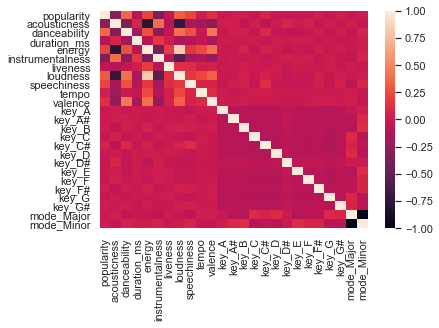

In [23]:
sns.set(font_scale=1)
sns.heatmap(df.corr(), xticklabels=True, yticklabels=True)

**Last Preparations for machine learning**

Convert music_genre music genres to numerical classes

In [24]:
df['music_genre'] = df['music_genre'].map({'Electronic': 0, 'Anime': 1, 'Jazz': 2, 'Alternative': 3, 'Country': 4, 'Rap': 5, 'Blues': 6, 'Rock': 7, 'Classical': 8, 'Hip-Hop': 9})

In [25]:
#  2. Perform standardization by centering and scaling all numerical features.
scaler = preprocessing.StandardScaler()
scaler.fit(df[df_numerical_features_list])
df[df_numerical_features_list] = scaler.transform(df[df_numerical_features_list], copy=False)

Lastly, the classes are equally represented in the dataset:

In [26]:
np.bincount(df['music_genre'])

array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
      dtype=int64)

##### 5. Model, predict and solve the problem

**Model selection**

We have 10 music genres to classify by performing supervised learning training on an available dataset. Thus, we want to use a supervised learning model to conduct classification and regression. For this project, we focus on classical machine learning algorithms. We shall examine the following algorithms:

  
    * Naive Bayes
    * KNN
    * Logistic Regression
    * Decision Tree
    * Random Forrest
    * Support Vector Machines


List of models and hyperparameters for grid search:

In [27]:
models = []

models.append(('GaussianNB', GaussianNB))
models.append(('KNN', KNeighborsClassifier))
models.append(('LogisticRegression', LogisticRegression))
models.append(('DecisionTree', DecisionTreeClassifier))
models.append(('RandomForest', RandomForestClassifier))
models.append(('SVC', SVC))

In [28]:
models_parameters = []

# GaussianNB
models_parameters.append([{'var_smoothing': [1e-11, 1e-10, 1e-9]}])

# KNN
models_parameters.append([{'n_neighbors': [9, 11, 13],
                           'weights': ['uniform', 'distance'],
                           'leaf_size': [5, 10, 15]}])

# LogisticRegression
models_parameters.append([{'penalty': ['l2', 'none'],
                           'intercept_scaling': [1, 2, 3],
                           'max_iter': [1000, 10000, 20000]}])

# DecisionTree
models_parameters.append([{'criterion': ['gini', 'entropy'],
                           'max_depth': [11, 13, 15]}])

# RandomForest
models_parameters.append([{'n_estimators': [100, 500, 700],
                           'criterion': ['gini', 'entropy'],
                           'max_depth': [11, 13, 15]}])

# SVC
models_parameters.append([{'C': [0.2, 0.3, 0.4],
                           'kernel': ['rbf', 'sigmoid'],
                           'max_iter': [3000, 5000, 7000],
                           'decision_function_shape': ['ovo', 'ovr']}])

In [29]:
models_all_data = np.concatenate((np.array(models), np.array(models_parameters)), axis=1)
models_all_data

array([['GaussianNB', <class 'sklearn.naive_bayes.GaussianNB'>,
        {'var_smoothing': [1e-11, 1e-10, 1e-09]}],
       ['KNN',
        <class 'sklearn.neighbors._classification.KNeighborsClassifier'>,
        {'n_neighbors': [9, 11, 13], 'weights': ['uniform', 'distance'], 'leaf_size': [5, 10, 15]}],
       ['LogisticRegression',
        <class 'sklearn.linear_model._logistic.LogisticRegression'>,
        {'penalty': ['l2', 'none'], 'intercept_scaling': [1, 2, 3], 'max_iter': [1000, 10000, 20000]}],
       ['DecisionTree',
        <class 'sklearn.tree._classes.DecisionTreeClassifier'>,
        {'criterion': ['gini', 'entropy'], 'max_depth': [11, 13, 15]}],
       ['RandomForest',
        <class 'sklearn.ensemble._forest.RandomForestClassifier'>,
        {'n_estimators': [100, 500, 700], 'criterion': ['gini', 'entropy'], 'max_depth': [11, 13, 15]}],
       ['SVC', <class 'sklearn.svm._classes.SVC'>,
        {'C': [0.2, 0.3, 0.4], 'kernel': ['rbf', 'sigmoid'], 'max_iter': [3000, 5000,

In [30]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('music_genre', axis=1), df['music_genre'], test_size=0.20, random_state=42)

**PCA**

By applying PCA, one can see that the first 14 features equal 95% of the energy.

Thus we drop the rest of the features.

In [31]:
pca_obj = PCA(n_components=25)
pca_obj.fit(x_train)
print('Checking all 25 features: ')
print('variance_ratio: ', pca_obj.explained_variance_ratio_)
cum_eig_vals = np.cumsum(pca_obj.explained_variance_ratio_)
print('cum_eig_vals: ', cum_eig_vals)
bool_components = cum_eig_vals <= 0.95
print('Sum of features to reach 95%: ', bool_components.sum())

Checking all 25 features: 
variance_ratio:  [3.00453476e-01 1.08438222e-01 8.56763624e-02 7.91500113e-02
 7.60152084e-02 6.65654465e-02 5.97876437e-02 4.83772267e-02
 3.71044274e-02 3.61623556e-02 2.08035259e-02 9.20498293e-03
 9.09967660e-03 8.61159085e-03 8.48533873e-03 7.91187547e-03
 7.04258056e-03 6.36814003e-03 6.05096318e-03 5.62950388e-03
 5.27811840e-03 5.08560433e-03 2.69771922e-03 5.71680068e-34
 1.23177073e-34]
cum_eig_vals:  [0.30045348 0.4088917  0.49456806 0.57371807 0.64973328 0.71629873
 0.77608637 0.8244636  0.86156802 0.89773038 0.91853391 0.92773889
 0.93683857 0.94545016 0.95393549 0.96184737 0.96888995 0.97525809
 0.98130905 0.98693856 0.99221668 0.99730228 1.         1.
 1.        ]
Sum of features to reach 95%:  14


In [32]:
pca_obj = PCA(n_components=bool_components.sum())
pca_obj.fit(x_train)
x_train_PCA = pca_obj.transform(x_train)  # create x_train_PCA
print(pca_obj.explained_variance_ratio_)
print(x_train_PCA[0])

[0.30045348 0.10843822 0.08567636 0.07915001 0.07601521 0.06656545
 0.05978764 0.04837723 0.03710443 0.03616236 0.02080353 0.00920498
 0.00909968 0.00861159]
[-0.39130241  0.80217743  0.28443127  1.42155286 -0.25423926 -1.16353717
 -0.44901556 -0.30609552 -0.96028204  0.57210196  0.09133694 -0.01496423
  0.04276148 -0.0183201 ]


In [33]:
# update x test version based of x train analysis
x_test_PCA = pca_obj.transform(x_test)
print(x_test_PCA[0])

[-0.79165281  0.83522761 -0.31729731  0.16821074 -0.52356807 -0.40963432
 -1.33147202  1.28535113 -0.23071155 -0.7051599   0.09240746  0.83621872
  0.36867604  0.39960901]


**Compare SVC classifier with and without PCA**

In [34]:
SVC_obj = models_all_data[5, 1]()
obj_model = GridSearchCV(estimator=SVC_obj, param_grid=[models_all_data[5, 2]], cv=5)
obj_model.fit(x_train, y_train)
y_prediction_train = obj_model.predict(x_train).astype(int)
accuracy_score_train = accuracy_score(y_train, y_prediction_train)

In [35]:
print('SVC')
print('Optimal parameters: ', obj_model.best_params_)
print('Train')
print('Accuracy score: ', round(accuracy_score_train * 100, 2))
print('Validation')
print('Accuracy score: ', round(obj_model.best_score_ * 100, 2))

SVC
Optimal parameters:  {'C': 0.4, 'decision_function_shape': 'ovo', 'kernel': 'rbf', 'max_iter': 5000}
Train
Accuracy score:  59.6
Validation
Accuracy score:  57.04


In [36]:
print(classification_report(y_train, y_prediction_train))

              precision    recall  f1-score   support

           0       0.66      0.63      0.64      3991
           1       0.76      0.73      0.74      3966
           2       0.58      0.55      0.56      4015
           3       0.47      0.39      0.42      3992
           4       0.55      0.57      0.56      4014
           5       0.50      0.35      0.41      3970
           6       0.63      0.55      0.59      3979
           7       0.53      0.73      0.61      4023
           8       0.83      0.85      0.84      4045
           9       0.47      0.61      0.53      4005

    accuracy                           0.60     40000
   macro avg       0.60      0.60      0.59     40000
weighted avg       0.60      0.60      0.59     40000



In [37]:
SVC_obj = models_all_data[5, 1]()
obj_model_PCA = GridSearchCV(estimator=SVC_obj, param_grid=[models_all_data[5, 2]], cv=5)
obj_model_PCA.fit(x_train_PCA, y_train)
y_prediction_train = obj_model_PCA.predict(x_train_PCA).astype(int)
accuracy_score_train = accuracy_score(y_train, y_prediction_train)

In [38]:
print('SVC_with_PCA')
print('Optimal parameters: ', obj_model_PCA.best_params_)
print('Train')
print('Accuracy score: ', round(accuracy_score_train * 100, 2))
print('Validation')
print('Accuracy score: ', round(obj_model_PCA.best_score_ * 100, 2))

SVC_with_PCA
Optimal parameters:  {'C': 0.4, 'decision_function_shape': 'ovo', 'kernel': 'rbf', 'max_iter': 5000}
Train
Accuracy score:  59.08
Validation
Accuracy score:  57.08


In [39]:
print(classification_report(y_train, y_prediction_train))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      3991
           1       0.76      0.72      0.74      3966
           2       0.57      0.54      0.55      4015
           3       0.46      0.39      0.42      3992
           4       0.55      0.57      0.56      4014
           5       0.49      0.34      0.40      3970
           6       0.63      0.54      0.58      3979
           7       0.52      0.72      0.61      4023
           8       0.83      0.85      0.84      4045
           9       0.47      0.60      0.53      4005

    accuracy                           0.59     40000
   macro avg       0.59      0.59      0.59     40000
weighted avg       0.59      0.59      0.59     40000



Based on the similar results yielded with and without PCA, PCA is chosen due to the formation of a smaller dataset, which demands significantly fewer resources to process.

We now implement the entire models' list:


In [40]:
obj_model_list = []
models_score_table = []
y_prediction_train = []
for name, model, parameters in models_all_data:
    model_starter = model()
    obj_model_list.append(GridSearchCV(estimator=model_starter, param_grid=parameters))
    obj_model_list[-1].fit(x_train_PCA, y_train)
    y_prediction_train.append(obj_model_list[-1].predict(x_train_PCA).astype(int))
    accuracy_score_train = accuracy_score(y_train, y_prediction_train[-1])
    models_score_table.append([name, obj_model_list[-1].best_params_, round(accuracy_score_train * 100, 2), round(obj_model_list[-1].best_score_ * 100, 2)])
    print(models_score_table[-1])

['GaussianNB', {'var_smoothing': 1e-11}, 47.38, 47.06]
['KNN', {'leaf_size': 5, 'n_neighbors': 13, 'weights': 'uniform'}, 59.84, 51.96]
['LogisticRegression', {'intercept_scaling': 1, 'max_iter': 1000, 'penalty': 'none'}, 53.06, 52.89]
['DecisionTree', {'criterion': 'gini', 'max_depth': 11}, 57.09, 46.03]
['RandomForest', {'criterion': 'entropy', 'max_depth': 13, 'n_estimators': 500}, 85.46, 52.89]
['SVC', {'C': 0.4, 'decision_function_shape': 'ovo', 'kernel': 'rbf', 'max_iter': 5000}, 59.08, 57.08]


In [41]:
target_names = np.arange(0,10,1)
for idx, prediction in enumerate(y_prediction_train):
    print(models_all_data[idx, 0])
    print(classification_report(y_train, y_prediction_train[idx]))

GaussianNB
              precision    recall  f1-score   support

           0       0.55      0.47      0.51      3991
           1       0.65      0.50      0.57      3966
           2       0.43      0.40      0.41      4015
           3       0.32      0.33      0.32      3992
           4       0.36      0.60      0.45      4014
           5       0.42      0.26      0.32      3970
           6       0.46      0.35      0.40      3979
           7       0.48      0.56      0.51      4023
           8       0.74      0.79      0.76      4045
           9       0.41      0.48      0.44      4005

    accuracy                           0.47     40000
   macro avg       0.48      0.47      0.47     40000
weighted avg       0.48      0.47      0.47     40000

KNN
              precision    recall  f1-score   support

           0       0.66      0.62      0.64      3991
           1       0.76      0.72      0.74      3966
           2       0.57      0.56      0.57      4015
         

In [42]:
# Convert output table to NumPy and extract methods with the best train and validate scores.
score = np.array(models_score_table)
train_score = score[:,2].astype(float)
validate_score = score[:,3].astype(float)
print('Best train score', score[np.where(train_score == np.amax(train_score)), :])
print('\nBest validate score', score[np.where(validate_score == np.amax(validate_score)), :])
train_position = np.where(train_score == np.amax(train_score))
validate_position = np.where(validate_score == np.amax(validate_score))

# Find the best balance between train to validate.
balanced_model = np.inf
balanced_idx = 0
for idx, data in enumerate(score):
    new_balanced_model = float(data[2]) - float(data[3])
    if new_balanced_model < balanced_model:
        balanced_model = new_balanced_model
        balanced_idx = idx

print('\nMost balanced model: ', score[balanced_idx, :])

Best train score [[['RandomForest'
   {'criterion': 'entropy', 'max_depth': 13, 'n_estimators': 500} 85.46
   52.89]]]

Best validate score [[['SVC'
   {'C': 0.4, 'decision_function_shape': 'ovo', 'kernel': 'rbf', 'max_iter': 5000}
   59.08 57.08]]]

Most balanced model:  ['LogisticRegression'
 {'intercept_scaling': 1, 'max_iter': 1000, 'penalty': 'none'} 53.06 52.89]


Based on the results the best model is:

In [43]:
score[np.where(validate_score == np.amax(validate_score)), :]

array([[['SVC',
         {'C': 0.4, 'decision_function_shape': 'ovo', 'kernel': 'rbf', 'max_iter': 5000},
         59.08, 57.08]]], dtype=object)

**Test:**

In [44]:
best_model_index = int(np.where(validate_score == np.amax(validate_score))[0])
y_prediction_test = obj_model_list[best_model_index].predict(x_test_PCA).astype(int)
accuracy_score_test = accuracy_score(y_test, y_prediction_test)

In [45]:
print(models_score_table[best_model_index])
print('Test accuracy score:', round(accuracy_score_test * 100, 2))
print('_'*50)
test_classification_report = classification_report(y_test, y_prediction_test, target_names=target_names_list)
print(test_classification_report)

['SVC', {'C': 0.4, 'decision_function_shape': 'ovo', 'kernel': 'rbf', 'max_iter': 5000}, 59.08, 57.08]
Test accuracy score: 57.33
__________________________________________________
              precision    recall  f1-score   support

  Electronic       0.65      0.62      0.63      1009
       Anime       0.75      0.70      0.72      1034
        Jazz       0.53      0.51      0.52       985
 Alternative       0.44      0.35      0.39      1008
     Country       0.52      0.56      0.54       986
         Rap       0.49      0.33      0.40      1030
       Blues       0.62      0.54      0.58      1021
        Rock       0.51      0.71      0.59       977
   Classical       0.80      0.84      0.82       955
     Hip-Hop       0.45      0.58      0.51       995

    accuracy                           0.57     10000
   macro avg       0.58      0.58      0.57     10000
weighted avg       0.58      0.57      0.57     10000



##### 6. Visualize, report, and present the problem-solving steps and final solution

**Visualization**

In [46]:
# Preparing data from a heatmap.
test_classification_report = """ precision    recall  f1-score   support

  Electronic       0.65      0.62      0.63      1009
       Anime       0.75      0.70      0.72      1034
        Jazz       0.53      0.51      0.52       985
 Alternative       0.44      0.35      0.39      1008
     Country       0.52      0.56      0.54       986
         Rap       0.49      0.33      0.40      1030
       Blues       0.62      0.54      0.58      1021
        Rock       0.51      0.71      0.59       977
   Classical       0.80      0.84      0.82       955
     Hip-Hop       0.45      0.58      0.51       995

        avg / total       0.58      0.57      0.57     10000"""

[0.65, 0.62, 0.63]
[0.75, 0.7, 0.72]
[0.53, 0.51, 0.52]
[0.44, 0.35, 0.39]
[0.52, 0.56, 0.54]
[0.49, 0.33, 0.4]
[0.62, 0.54, 0.58]
[0.51, 0.71, 0.59]
[0.8, 0.84, 0.82]
[0.45, 0.58, 0.51]
plotMat: [[0.65, 0.62, 0.63], [0.75, 0.7, 0.72], [0.53, 0.51, 0.52], [0.44, 0.35, 0.39], [0.52, 0.56, 0.54], [0.49, 0.33, 0.4], [0.62, 0.54, 0.58], [0.51, 0.71, 0.59], [0.8, 0.84, 0.82], [0.45, 0.58, 0.51]]
support: [1009, 1034, 985, 1008, 986, 1030, 1021, 977, 955, 995]


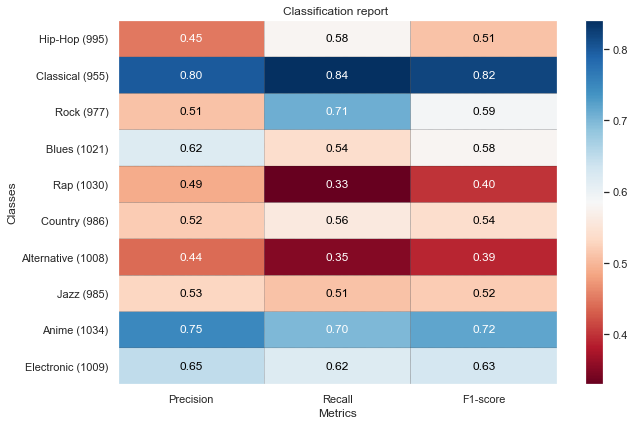

In [47]:
plot_classification_report(test_classification_report)

**Discussion:**

* Results:
    
    * The best performance can be seen in classical music, followed by anime and electronic genres. These genres have unique features. For example, the duration of classical music is very long and has extremely low acousticness comparably to other genres.

    * The lowest performances are with Rap and alternative music. Rap is unique only by popularity with a minor advantage over rock. Alternative is at the top of loudness, with rap at almost similar value. The two least performing genres of rap and alternative share several features, such as acousticness and liveness,  with exceptionally close values that could cause a classification error between the two.


* Models performance:
    
    * GaussianNB: naive Bayes performance was among the lowest. One way to improve its performance is by splitting the data by its features into a categorical and numerical dataset and a modified version of naive Bayes, which fit each type. The probability of the two models can be used for the final prediction.
    
    * KNN: K-nearest neighbors classifier presented median results in a challenging dataset where many features are indistinguishable between music genres.
    
    * LogisticRegression: logistic regression can handle the type of data used in this project. Nevertheless, the final classification decision is ambiguous when features values of different music genres are similar.
    
    * DecisionTree: decision tree performance was the poorest. The number of classes, features, and data was too much for a single tree to handle.
    
    * RandomForest: random forest model prospects from applying many trees, which reduces the effect of the data size. The train score of the model was the highest, indicating over-fitting due to a much lower validation score.
    
    * SVC: C-Support Vector Classification can handle multiclass datasets. This model is ideal for multi-dimensional data separation, which enabled it to produce a high train score and the best validation results. Making it the leading candidate for the test phase.


Terminology:

Precision - True Positives / Total Predicted Positive

Recall - True Positives / Total Actual Positive

F1-score - 2 x (Precision * Recall / Precision * Recall)

**Summary**

* Data was analyzed, cleaned, and organized.

* PCA was applied to reduce features, which enabled shorter data processing and better classification.

* 6 machine learning classifiers models were tested with multiple hyperparameters.

* The best model, by validation score, was applied to analyze the test dataset.

* Viewing the final test score, one should note that random pick out of 9 classifications equals an 11.11% success rate:

In [48]:
print('Test accuracy score:', round(accuracy_score_test * 100, 2))

Test accuracy score: 57.33


**Future improvements:** 

* Merge similar music genres will reduce the quality of the result but allow for better predictions as a whole; For example, rap and alternative genres.

* Transfer the names of the songs into a length value to promote a new feature by NLP Word2Vec classifier.

* Examine unsupervised and deep-learning models.

##### 7. Supply or submit the results.

No test file is available to predict and submit.